
# Instagram Reels Data Analysis

## Introduction
This project aims to analyze Instagram Reels data to identify patterns and trends in engagement metrics. By examining features such as caption, duration, and posting time, we hope to determine what factors influence engagement (e.g., likes, saves, and views).

### Tools
- **Jupyter Notebook**: For interactive coding and analysis.
- **Python Libraries**: Pandas, Matplotlib, and Seaborn for data manipulation and visualization.

### Dataset
The dataset was extracted from Instagram Reels insights and includes the following features:
- Caption
- Upload Timestamp
- Duration (seconds)
- Accounts Reached
- Plays
- Likes
- Comments
- Shares
- Saves

In [1]:
!pip install pandas matplotlib seaborn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip



# Necessary Imports

 - Necessary imports are made

In [2]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
import networkx as nx
import plotly.express as px
import plotly.graph_objects as go
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score

In [3]:
# Load the dataset
file_path = 'reels_data.csv'  
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Video Source,Caption,Upload Timestamp,Duration,Accountsreached,InstagramPlays,InstagramLikes,InstagramComments,InstagramShares,InstagramSaves
0,media/reels/202401/C64410D5B7EEB19CC8D542C51A7...,the Dragon of the West.\n\n#uncleiroh #avatart...,"Jan 29, 2024 4:32 am",80,517,568,39,2,1,3
1,media/reels/202312/D846C25F37EA7FA367484881CD7...,Set’in minyonları serbest kalıyor.\n\n🎞️Samura...,"Dec 29, 2023 6:13 am",33,1617,1705,59,2,1,9
2,media/reels/202312/F24D35ED372FA06C981A9143182...,"Gotta get back, back to the past\n\n#samuraija...","Dec 26, 2023 10:19 am",74,1180,1262,88,0,25,13
3,media/reels/202312/0940AB74A01E6DA3190D85E4624...,Bütün gücü ve yaverinde.\n\n#benten #cartoonne...,"Dec 23, 2023 8:27 am",52,1349,1500,127,7,12,20
4,media/reels/202312/BD4245DFCE1BEF7578CB3C7F096...,Sınava çalışmamak için bahaneler\n\n#powerpuff...,"Dec 22, 2023 6:49 am",9,2494,2563,126,1,42,14


# Dataset Overview

- Displaying the structure and basic information of the dataset
- Provides information about column data types, non-null counts, and memory usage

# Displaying descriptive statistics of the numeric columns in the dataset
- Generates summary statistics for numeric columns (e.g., count, mean, std, min, max)

In [4]:
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Video Source       121 non-null    object
 1   Caption            121 non-null    object
 2   Upload Timestamp   121 non-null    object
 3   Duration           121 non-null    int64 
 4   Accountsreached    121 non-null    int64 
 5   InstagramPlays     121 non-null    int64 
 6   InstagramLikes     121 non-null    int64 
 7   InstagramComments  121 non-null    int64 
 8   InstagramShares    121 non-null    int64 
 9   InstagramSaves     121 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 9.6+ KB


,Duration,Accountsreached,InstagramPlays,InstagramLikes,InstagramComments,InstagramShares,InstagramSaves
count,121.000000,1.210000e+02,1.210000e+02,121.000000,121.000000,121.000000,121.000000
mean,40.809917,7.173701e+04,7.625503e+04,5042.247934,19.107438,807.479339,946.611570
std,24.784509,2.143015e+05,2.299423e+05,16525.349405,50.547470,3752.011718,3550.621069
min,7.000000,5.170000e+02,5.680000e+02,30.000000,0.000000,0.000000,3.000000
25%,21.000000,2.115000e+03,2.200000e+03,99.000000,2.000000,8.000000,12.000000
50%,33.000000,4.061000e+03,4.194000e+03,191.000000,5.000000,23.000000,26.000000
75%,60.000000,1.659200e+04,1.686900e+04,851.000000,13.000000,95.000000,113.000000
max,90.000000,1.553583e+06,1.655046e+06,98357.000000,416.000000,34772.000000,24571.000000


# Converting Timestamp to Datetime Format

- Converts the 'Upload Timestamp' column to a datetime format for easier manipulation and analysis

In [5]:
data['Upload Timestamp'] = pd.to_datetime(data['Upload Timestamp'], format='%b %d, %Y %I:%M %p')


# Drop rows with missing values
- Ensures the dataset is clean for analysis


In [6]:
data = data.dropna()  

# Visualization of Reel Distribution Over Time

 This code visualizes the number of Instagram Reels shared each month and year.
 To provide a clear and concise representation, months with zero reels are excluded from the analysis.
 The graph illustrates trends in reel sharing activity over time, helping to identify peak and low periods.

 The data is filtered to show only months with at least one reel shared.
 Each year's data is plotted separately for clarity and ease of comparison.

In [8]:
# Extract month and year from the 'Upload Timestamp' column
data['Year'] = data['Upload Timestamp'].dt.year
data['Month'] = data['Upload Timestamp'].dt.strftime('%B')

# Create a datetime column for sorting
data['YearMonth'] = pd.to_datetime(data['Upload Timestamp'].dt.strftime('%Y-%m'))

# Group by year and month and count the number of reels
reels_by_month_year = data.groupby(['Year', 'Month', 'YearMonth']).size().reset_index(name='Number of Reels')

# Sort the DataFrame by the new datetime column
reels_by_month_year = reels_by_month_year.sort_values(by='YearMonth').drop(columns='YearMonth')

# Display the DataFrame
reels_by_month_year.reset_index(drop=True, inplace=True)

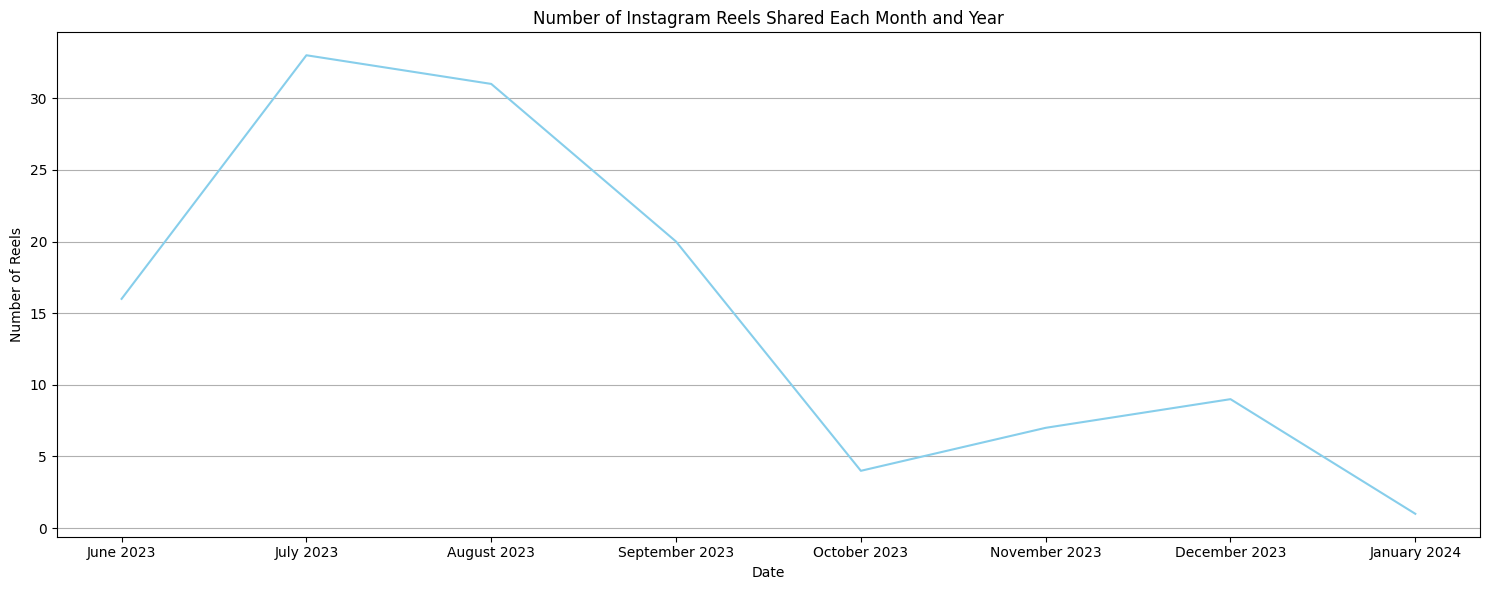

In [9]:
reels_by_month_year['Date'] = reels_by_month_year['Month'] + ' ' + reels_by_month_year['Year'].astype(str)

reels_by_month_year_filtered = reels_by_month_year[reels_by_month_year['Number of Reels'] > 0]
# Plot the number of reels shared each month and year
plt.figure(figsize=(15, 6))
reels_by_month_year_filtered['Number of Reels'].plot(kind='line',color='skyblue', xlabel='Date', ylabel='Number of Reels', title='Number of Instagram Reels Shared Each Month and Year')
plt.xticks(ticks=np.arange(len(reels_by_month_year_filtered)), labels=reels_by_month_year_filtered['Date'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()

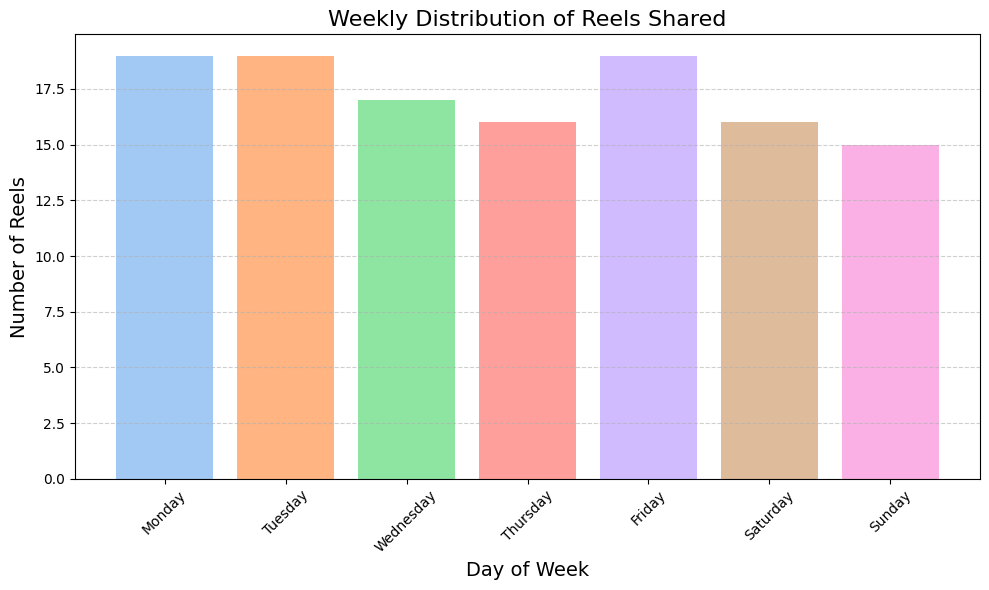

In [10]:
data['Day of Week'] = data['Upload Timestamp'].dt.day_name()

reels_by_day = (
    data.groupby(data['Day of Week'])['Upload Timestamp']
    .count()
    .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    .reset_index(name='Number of Reels')
)

color_palette = sns.color_palette("pastel", n_colors=len(reels_by_day['Day of Week']))
plt.figure(figsize=(10, 6))
plt.bar(reels_by_day['Day of Week'], reels_by_day['Number of Reels'], color=color_palette)
plt.title('Weekly Distribution of Reels Shared', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Number of Reels', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## Functionality: Analyze Instagram Plays Distribution by Day of the Week

 This code calculates the total number of Instagram Plays for each day of the week 
 and visualizes the data using a bar chart. It ensures the days are ordered 
 from Monday to Sunday and fills missing days with 0 for accurate representation.
 A clear visualization highlights engagement trends across the week.


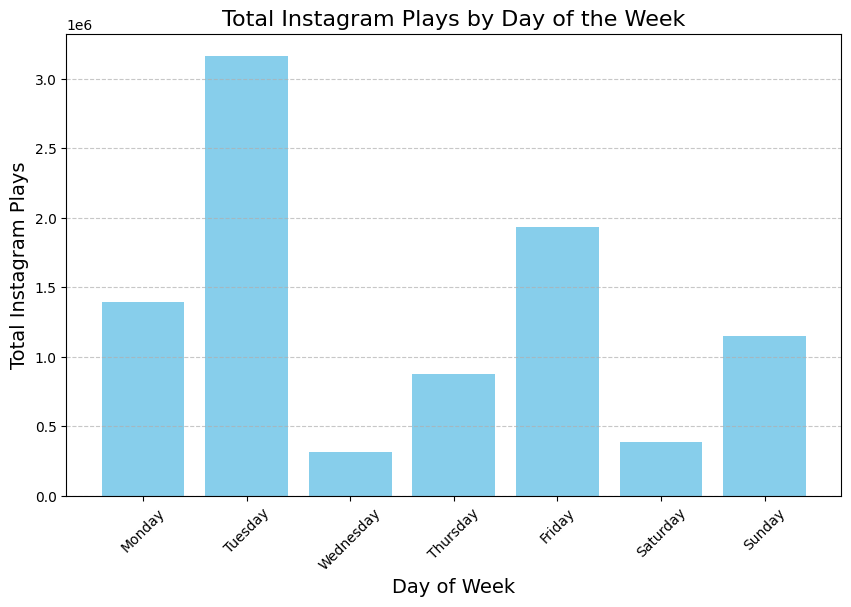

In [11]:
plays_by_day = data.groupby('Day of Week')['InstagramPlays'].sum().reset_index()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plays_by_day['Day of Week'] = pd.Categorical(plays_by_day['Day of Week'], categories=day_order, ordered=True)
plays_by_day = plays_by_day.sort_values('Day of Week')

plt.figure(figsize=(10, 6))
plt.bar(plays_by_day['Day of Week'], plays_by_day['InstagramPlays'], color='skyblue')
plt.title('Total Instagram Plays by Day of the Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Total Instagram Plays', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Functionality: Analyze Average Instagram Plays by Day of the Week

  This code calculates the average number of Instagram Plays for each day of the week 
  and visualizes the results in a bar chart. It ensures the days are ordered 
  from Monday to Sunday for clarity and helps identify the day with the highest average plays.

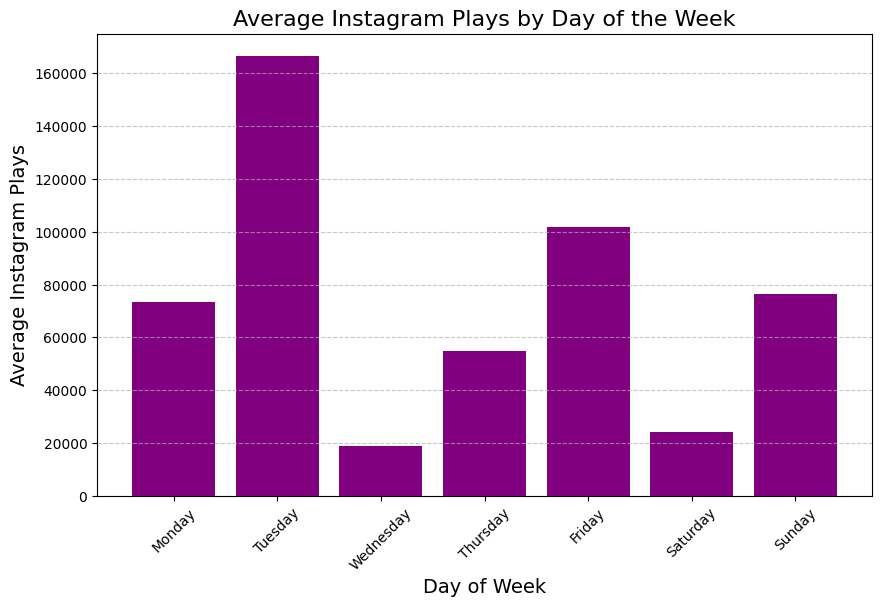

In [12]:
# Calculate average Instagram Plays by day of the week
average_plays_by_day = data.groupby('Day of Week')['InstagramPlays'].mean().reset_index()

# Ensure days are ordered from Monday to Sunday
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_plays_by_day['Day of Week'] = pd.Categorical(average_plays_by_day['Day of Week'], categories=day_order, ordered=True)
average_plays_by_day = average_plays_by_day.sort_values('Day of Week')

# Plot the average Instagram Plays by Day of the Week
plt.figure(figsize=(10, 6))
plt.bar(average_plays_by_day['Day of Week'], average_plays_by_day['InstagramPlays'], color='purple')
plt.title('Average Instagram Plays by Day of the Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Average Instagram Plays', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



# Functionality: Visualize Instagram Reels Count by 2-Hour Slots and Day of the Week

 This code creates a heatmap to analyze the distribution of Instagram Reels across fixed 2-hour time slots 
 and days of the week. The goal is to identify peak times for posting content.


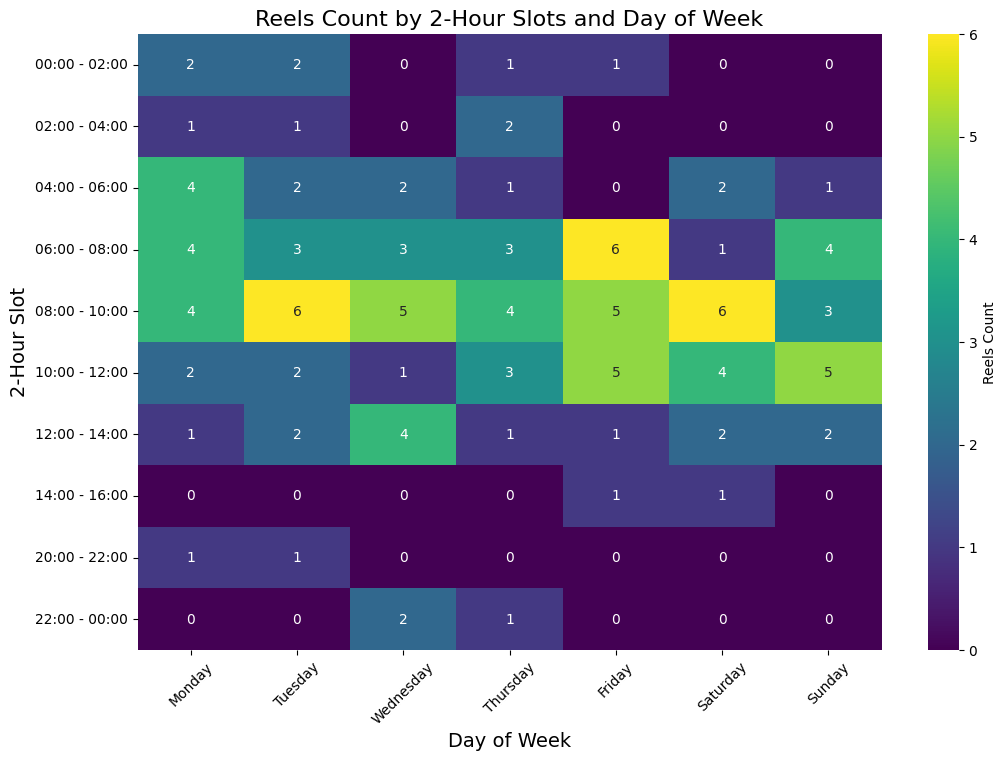

In [13]:
# Extract day of the week and hour
data['Day of Week'] = data['Upload Timestamp'].dt.day_name()
data['Hour'] = data['Upload Timestamp'].dt.hour

# Define fixed 2-hour time slots (e.g., 00:00 - 02:00, 02:00 - 04:00 ...)
def get_time_slot(hour):
    start_hour = (hour // 2) * 2
    start = f"{start_hour:02d}:00"
    end = f"{(start_hour + 2) % 24:02d}:00"
    return f"{start} - {end}"

data['2-Hour Slot'] = data['Hour'].apply(get_time_slot)

# Group data by 'Day of Week' and '2-Hour Slot' and count reels
time_analysis = data.groupby(['Day of Week', '2-Hour Slot']).size().reset_index(name='Reels Count')

# Sort days of the week for logical visualization
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
time_analysis['Day of Week'] = pd.Categorical(time_analysis['Day of Week'], categories=day_order, ordered=True)
time_analysis = time_analysis.sort_values(['Day of Week', '2-Hour Slot'])

# Create a pivot table for the heatmap
pivot_table = time_analysis.pivot_table(index='2-Hour Slot', columns='Day of Week', values='Reels Count', fill_value=0)

# Generate the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='g', cbar_kws={'label': 'Reels Count'})
plt.title('Reels Count by 2-Hour Slots and Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('2-Hour Slot', fontsize=14)
plt.xticks(rotation=45)
plt.show()


# Functionality: Analyze Average Instagram Plays by 2-Hour Slots and Day of the Week

 This code generates a heatmap to examine average Instagram Plays during fixed 2-hour time slots
 across different days of the week. It helps identify optimal posting times for better engagement.


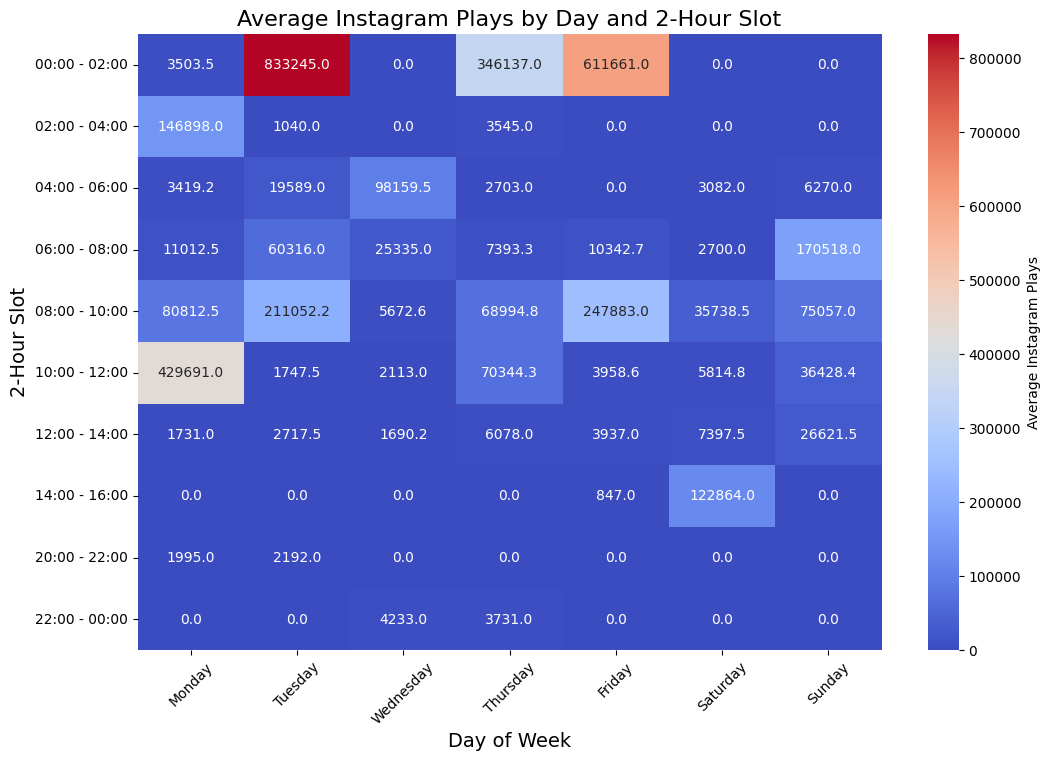

In [14]:
# Extract the day of the week and hour
data['Day of Week'] = data['Upload Timestamp'].dt.day_name()
data['Hour'] = data['Upload Timestamp'].dt.hour

# Define fixed 2-hour time slots (e.g., 00:00 - 02:00, 02:00 - 04:00, etc.)
def get_time_slot(hour):
    start_hour = (hour // 2) * 2  # Ensure slots start at even hours
    start = f"{start_hour:02d}:00"
    end = f"{(start_hour + 2) % 24:02d}:00"
    return f"{start} - {end}"

data['2-Hour Slot'] = data['Hour'].apply(get_time_slot)

# Group data by 'Day of Week' and '2-Hour Slot' to calculate average Instagram Plays
average_plays = data.groupby(['Day of Week', '2-Hour Slot'])['InstagramPlays'].mean().reset_index()

# Sort days of the week and time slots for better visualization
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_plays['Day of Week'] = pd.Categorical(average_plays['Day of Week'], categories=day_order, ordered=True)
average_plays = average_plays.sort_values(['Day of Week', '2-Hour Slot'])

# Create a pivot table for heatmap generation
pivot_table = average_plays.pivot_table(
    index='2-Hour Slot', columns='Day of Week', values='InstagramPlays', fill_value=0
)

# Plot the heatmap to visualize average Instagram Plays
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.1f', cbar_kws={'label': 'Average Instagram Plays'})
plt.title('Average Instagram Plays by Day and 2-Hour Slot', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('2-Hour Slot', fontsize=14)
plt.xticks(rotation=45)
plt.show()


# Functionality: Visualize Relationship Between Reel Duration and Instagram Plays
 This code generates a scatter plot to illustrate the relationship between the duration of 
 Instagram Reels (in seconds) and the number of Instagram Plays. It helps in identifying 
 patterns or trends in engagement based on reel length.


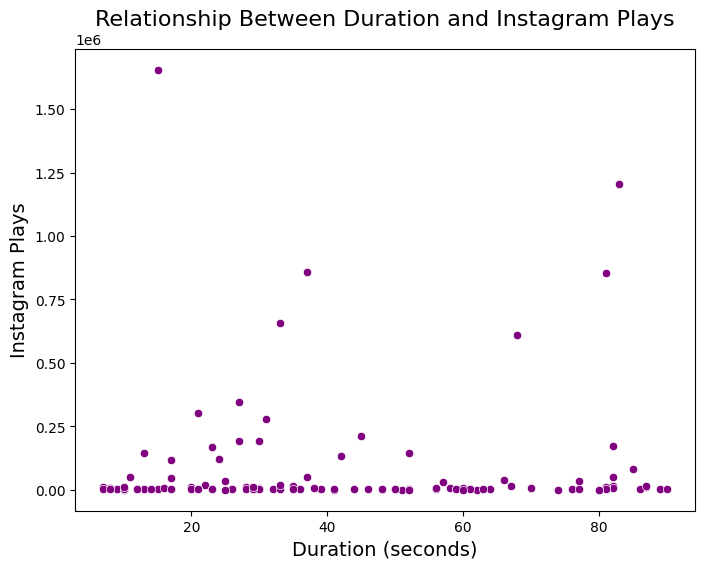

In [15]:

# Create a scatter plot for duration vs. Instagram Plays
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Duration', y='InstagramPlays', color='purple')

# Add plot title and axis labels
plt.title('Relationship Between Duration and Instagram Plays', fontsize=16)
plt.xlabel('Duration (seconds)', fontsize=14)
plt.ylabel('Instagram Plays', fontsize=14)

# Display the plot
plt.show()


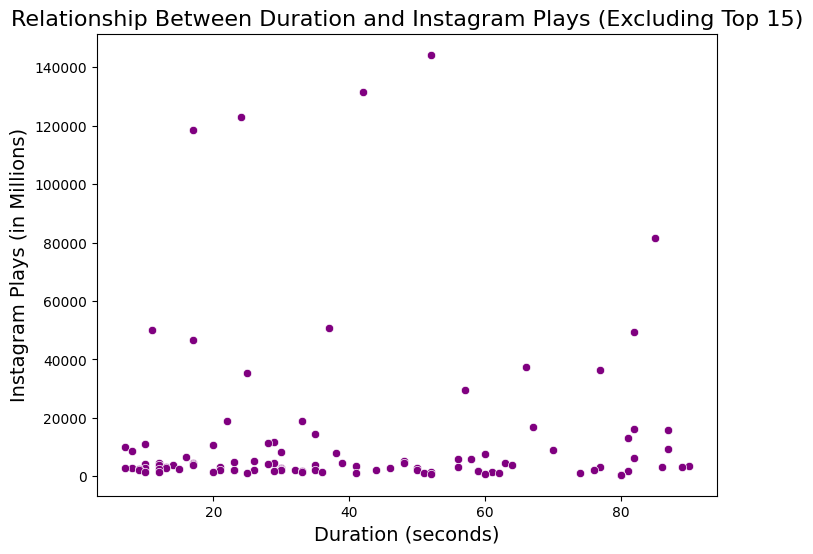

In [16]:
# Filter out the top 15 rows with the highest Instagram Plays
filtered_data = data.sort_values(by='InstagramPlays', ascending=False).iloc[15:]

# Format y-axis labels in millions
def plain_formatter(x, pos):
    return f'{x / 1_000_000:.2f}M'

# Scatter plot for Duration vs. Instagram Plays
plt.figure(figsize=(8, 6))
sns.scatterplot(data=filtered_data, x='Duration', y='InstagramPlays', color='purple')

plt.title('Relationship Between Duration and Instagram Plays (Excluding Top 15)', fontsize=16)
plt.xlabel('Duration (seconds)', fontsize=14)
plt.ylabel('Instagram Plays (in Millions)', fontsize=14)
#plt.gca().yaxis.set_major_formatter(FuncFormatter(plain_formatter))

plt.show()


### Create subplots to visualize average engagement metrics (plays, likes, comments, etc.) and total reels count
 based on video length categories.

 `metrics`: List of engagement metrics to plot individually.
 `axes`: Subplots arranged in a 3x2 grid for all metrics plus total reels count.

 The last subplot visualizes total reels count by video length category.
 Unused subplot spaces are removed for cleaner visualization.


!TO-DO

In [17]:
# Categorize videos by length
def categorize_video_length(duration):
    if duration < 15:
        return 'Very Short (<15s)'
    elif 15 <= duration <= 30:
        return 'Short (15-30s)'
    elif 31 <= duration <= 60:
        return 'Medium (31-60s)'
    else:
        return 'Long (>60s)'

# Apply the categorization
data['Video Length Category'] = data['Duration'].apply(categorize_video_length)

# Calculate average engagement metrics by video length category
engagement_by_video_length = data.groupby('Video Length Category')[
    ['InstagramPlays', 'InstagramLikes', 'InstagramComments', 'InstagramShares', 'InstagramSaves']
].mean().reset_index()

# Calculate total engagement metrics by video length category
total_engagement_by_video_length = data.groupby('Video Length Category')[
    ['InstagramPlays', 'InstagramLikes', 'InstagramComments', 'InstagramShares', 'InstagramSaves']
].sum().reset_index()

## Video Duration Impact on Engagement

 This code categorizes Instagram Reels' video durations into four categories: Very Short, Short, Medium, and Long. 
 It calculates the average engagement metrics (Plays, Likes, Comments, Shares, Saves) for each duration category and visualizes these metrics using bar plots.


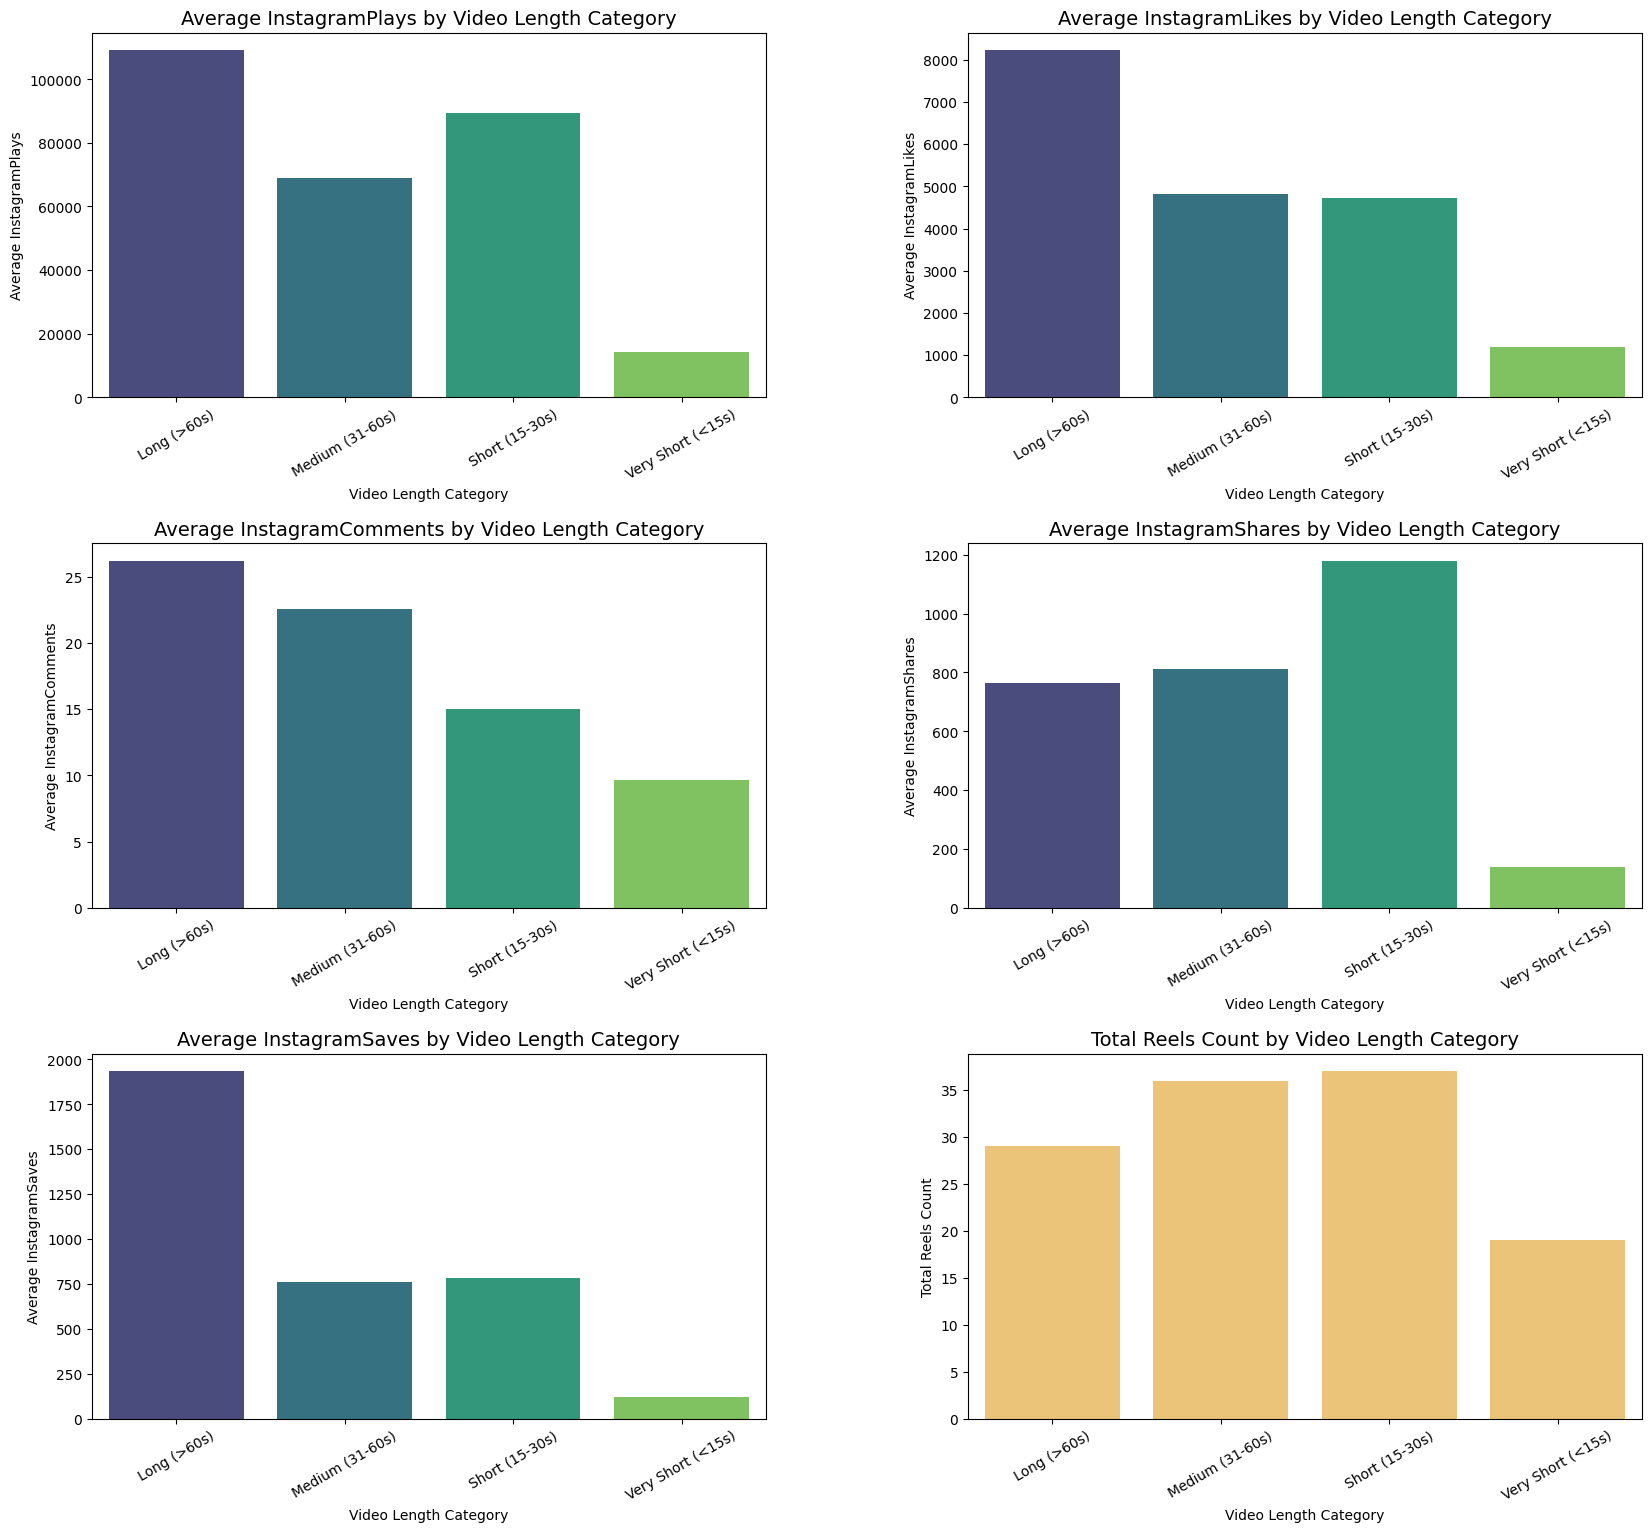

In [18]:
# Group by duration category and calculate average metrics
duration_impact = data.groupby('Video Length Category')[
    ['InstagramPlays', 'InstagramLikes', 'InstagramComments', 'InstagramShares', 'InstagramSaves']
].mean().reset_index()

# Define metrics for plotting
metrics = ['InstagramPlays', 'InstagramLikes', 'InstagramComments', 'InstagramShares', 'InstagramSaves']
# Add total reels count for each duration category
duration_impact['Reels Count'] = data.groupby('Video Length Category').size().reset_index(name='Reels Count')['Reels Count']

# Create subplots for metrics and total reels count
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 18))
axes = axes.flatten()

# Plot individual metrics
for i, metric in enumerate(metrics):
    ax = axes[i]
    sns.barplot(
        data=duration_impact, 
        x='Video Length Category', 
        y=metric, 
        ax=ax, 
        palette='viridis'
    )
    ax.set_title(f'Average {metric} by Video Length Category', fontsize=14)
    ax.set_xlabel('Video Length Category', fontsize=10)
    ax.set_ylabel(f'Average {metric}', fontsize=10)
    ax.tick_params(axis='x', rotation=30)

# Add total reels count in the last subplot
ax = axes[len(metrics)]
sns.barplot(
    data=duration_impact, 
    x='Video Length Category', 
    y='Reels Count', 
    ax=ax, 
    color='orange', 
    alpha=0.6
)
ax.set_title('Total Reels Count by Video Length Category', fontsize=14)
ax.set_xlabel('Video Length Category', fontsize=10)
ax.set_ylabel('Total Reels Count', fontsize=10)
ax.tick_params(axis='x', rotation=30)

# Remove any unused subplot spaces
for i in range(len(metrics) + 1, len(axes)):
    fig.delaxes(axes[i])

# Adjust layout for better spacing
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()


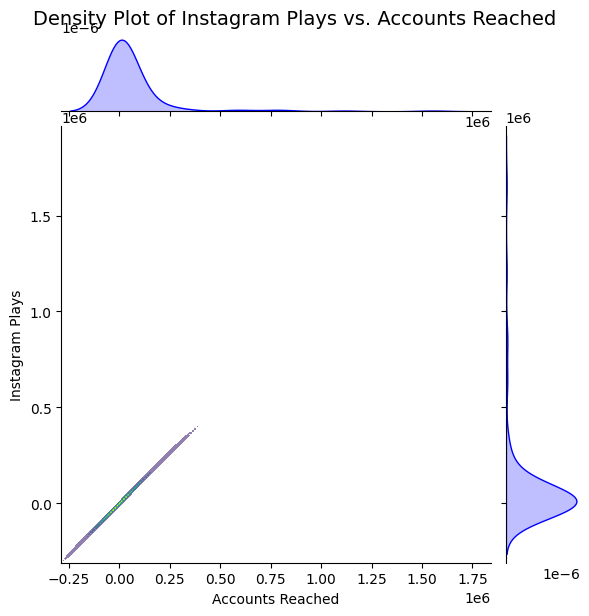

In [19]:
# Ensure column names are clean
data.columns = data.columns.str.strip().str.replace(" ", "_")

# Create a density plot with marginal histograms
sns.jointplot(
    data=data,
    x="Accountsreached",
    y="InstagramPlays",
    kind="kde",  # Kernel Density Estimate for the density plot
    fill=True,  # Fill the density plot
    cmap="viridis",  # Color map for the density plot
    marginal_kws={'fill': True, 'color': 'blue'},  # Configure marginal histograms
    joint_kws={'alpha': 0.6}  # Adjust joint plot transparency
).set_axis_labels("Accounts Reached", "Instagram Plays")

# Add a title
plt.suptitle("Density Plot of Instagram Plays vs. Accounts Reached", y=1.02, fontsize=14)

# Show the plot
plt.show()


## After removing outliers

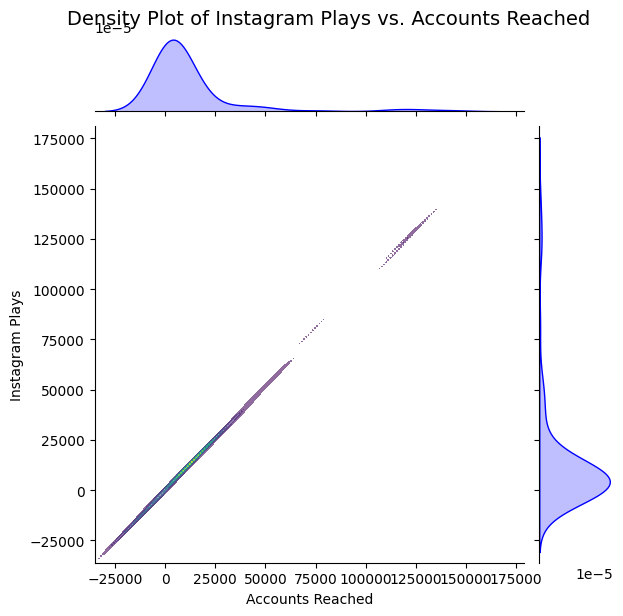

In [20]:
# Filter out the top 15 rows with the highest Instagram Plays
filtered_data = data.sort_values(by='InstagramPlays', ascending=False).iloc[15:]

# Create a density plot with marginal histograms
sns.jointplot(
    data=filtered_data,
    x="Accountsreached",
    y="InstagramPlays",
    kind="kde",  # Kernel Density Estimate for the density plot
    fill=True,  # Fill the density plot
    cmap="viridis",  # Color map for the density plot
    marginal_kws={'fill': True, 'color': 'blue'},  # Configure marginal histograms
    joint_kws={'alpha': 0.6}  # Adjust joint plot transparency
).set_axis_labels("Accounts Reached", "Instagram Plays")

# Add a title
plt.suptitle("Density Plot of Instagram Plays vs. Accounts Reached", y=1.02, fontsize=14)

# Show the plot
plt.show()


# Analyze Hashtag Usage and Engagement
 This script extracts hashtags from captions, identifies the most frequently used ones, and visualizes their frequency. 
 Additionally, it calculates and visualizes the average InstagramPlays for videos containing each of the top 10 hashtags individually.


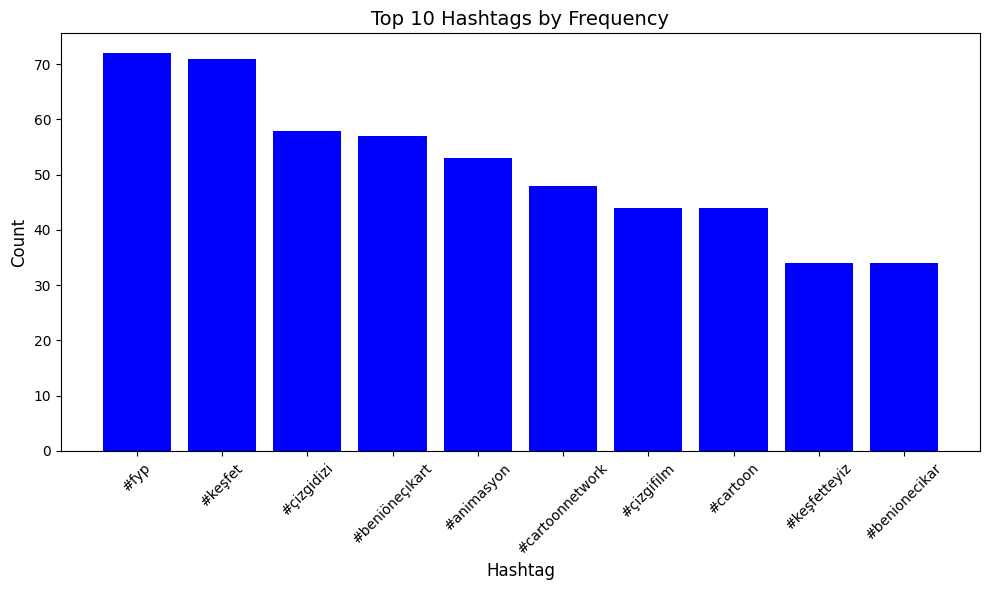

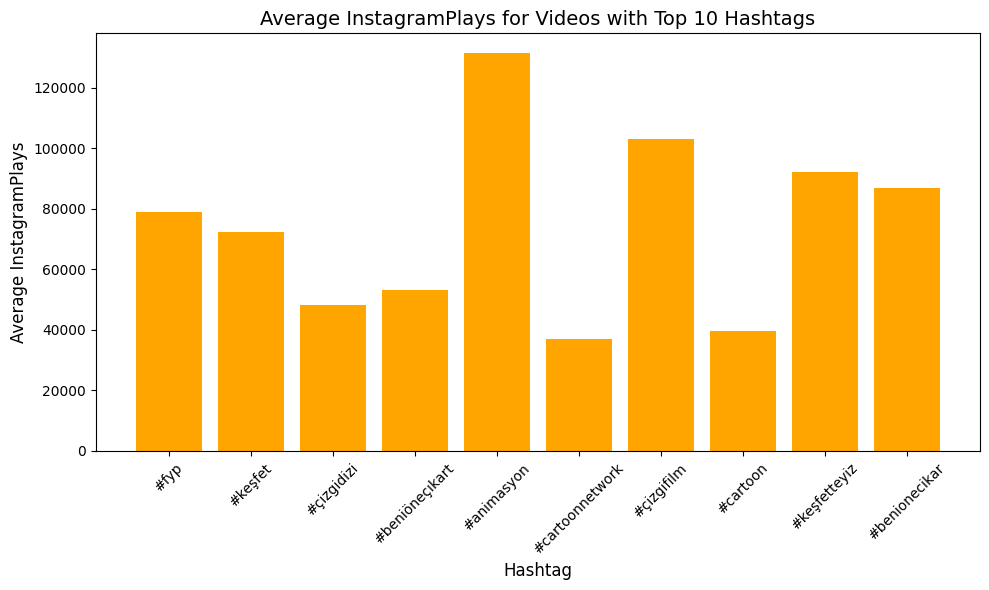

In [21]:
from collections import Counter

# Function to extract hashtags from captions
def extract_hashtags(caption):
    return [word.lower() for word in caption.split() if word.startswith('#')]

# Add a new 'Hashtags' column
data['Hashtags'] = data['Caption'].apply(extract_hashtags)

# Flatten the list of hashtags and count occurrences
all_hashtags = [hashtag for sublist in data['Hashtags'] for hashtag in sublist]
hashtag_counts = Counter(all_hashtags)

# Get the top 10 most used hashtags
top_hashtags = hashtag_counts.most_common(10)
top_hashtags_df = pd.DataFrame(top_hashtags, columns=['Hashtag', 'Count'])

# Visualize the top 10 hashtags
plt.figure(figsize=(10, 6))
plt.bar(top_hashtags_df['Hashtag'], top_hashtags_df['Count'], color='blue')
plt.xlabel('Hashtag', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top 10 Hashtags by Frequency', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Prepare a list of top hashtags
top_hashtags_list = [hashtag[0] for hashtag in top_hashtags]

# Calculate average InstagramPlays for videos containing each top hashtag
average_plays_per_hashtag = {}
for hashtag in top_hashtags_list:
    average_plays_per_hashtag[hashtag] = data[data['Hashtags'].apply(lambda x: hashtag in x)]['InstagramPlays'].mean()

# Convert to DataFrame for visualization
average_plays_df = pd.DataFrame.from_dict(average_plays_per_hashtag, orient='index', columns=['Average InstagramPlays'])
average_plays_df.reset_index(inplace=True)
average_plays_df.rename(columns={'index': 'Hashtag'}, inplace=True)

# Visualize the average InstagramPlays for each of the top 10 hashtags
plt.figure(figsize=(10, 6))
plt.bar(average_plays_df['Hashtag'], average_plays_df['Average InstagramPlays'], color='orange')
plt.xlabel('Hashtag', fontsize=12)
plt.ylabel('Average InstagramPlays', fontsize=12)
plt.title('Average InstagramPlays for Videos with Top 10 Hashtags', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


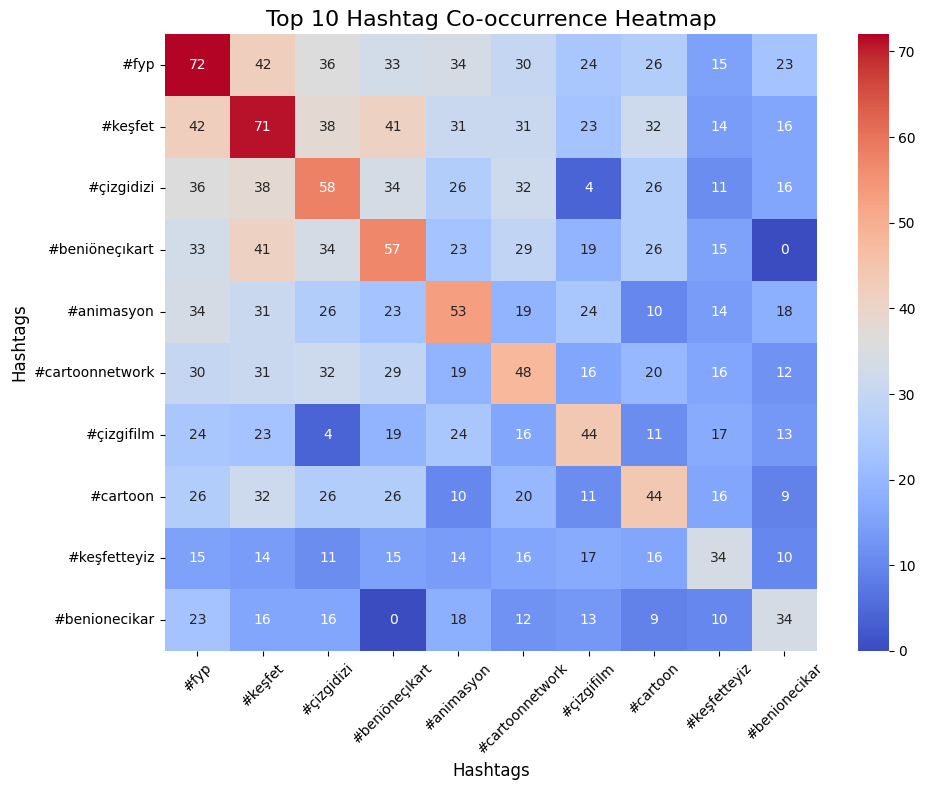

In [22]:

# Flatten the list of hashtags for all posts
all_hashtags = [hashtag for hashtags in data['Hashtags'] for hashtag in hashtags]

# Count hashtag frequencies
hashtag_counts = Counter(all_hashtags)

# Get the top 10 hashtags
top_10_hashtags = [hashtag for hashtag, count in hashtag_counts.most_common(10)]

# Filter hashtags in the dataset to include only top 10
data['Filtered Hashtags'] = data['Hashtags'].apply(lambda x: [tag for tag in x if tag in top_10_hashtags])

# Create a co-occurrence matrix for the top 10 hashtags
top_10_matrix = pd.DataFrame(0, index=top_10_hashtags, columns=top_10_hashtags)

# Fill the co-occurrence matrix
for hashtags in data['Filtered Hashtags']:
    for i in range(len(hashtags)):
        for j in range(i, len(hashtags)):
            top_10_matrix.loc[hashtags[i], hashtags[j]] += 1
            if hashtags[i] != hashtags[j]:
                top_10_matrix.loc[hashtags[j], hashtags[i]] += 1

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    top_10_matrix, 
    cmap='coolwarm', 
    annot=True, 
    cbar=True, 
    xticklabels=True, 
    yticklabels=True
)
plt.title('Top 10 Hashtag Co-occurrence Heatmap', fontsize=16)
plt.xlabel('Hashtags', fontsize=12)
plt.ylabel('Hashtags', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


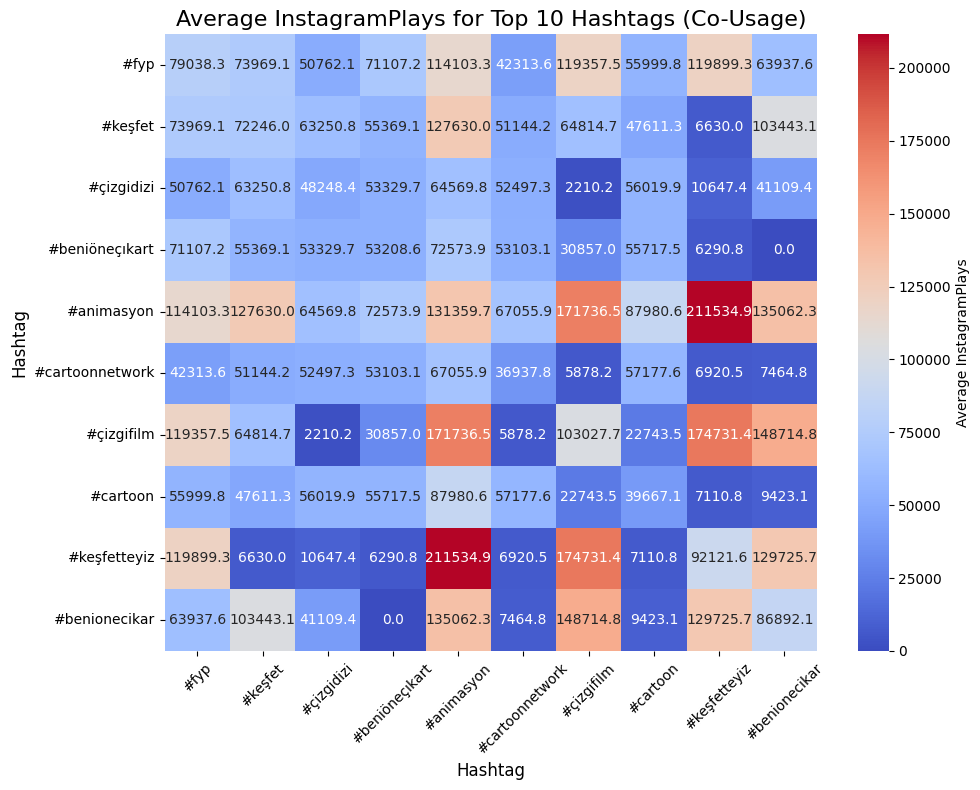

In [23]:
from itertools import combinations

# Create a co-occurrence matrix for the top 10 hashtags
hashtag_combinations = pd.DataFrame(0, index=top_hashtags_list, columns=top_hashtags_list, dtype=float)

for hashtags, plays in zip(data['Hashtags'], data['InstagramPlays']):
    relevant_hashtags = [hashtag for hashtag in hashtags if hashtag in top_hashtags_list]
    for combo in combinations(relevant_hashtags, 2):
        hashtag_combinations.loc[combo[0], combo[1]] += plays
        hashtag_combinations.loc[combo[1], combo[0]] += plays

# Fill diagonal with the average plays for each individual hashtag
for hashtag in top_hashtags_list:
    total_plays = data[data['Hashtags'].apply(lambda x: hashtag in x)]['InstagramPlays'].sum()
    count = data[data['Hashtags'].apply(lambda x: hashtag in x)].shape[0]
    hashtag_combinations.loc[hashtag, hashtag] = total_plays / max(count, 1)

# Normalize values by occurrence count
for hashtag1 in top_hashtags_list:
    for hashtag2 in top_hashtags_list:
        if hashtag1 != hashtag2:
            co_occurrence_count = data[data['Hashtags'].apply(lambda x: hashtag1 in x and hashtag2 in x)].shape[0]
            if co_occurrence_count > 0:
                hashtag_combinations.loc[hashtag1, hashtag2] /= co_occurrence_count

# Create a heatmap for average InstagramPlays
plt.figure(figsize=(10, 8))
sns.heatmap(hashtag_combinations, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Average InstagramPlays'})
plt.title('Average InstagramPlays for Top 10 Hashtags (Co-Usage)', fontsize=16)
plt.xlabel('Hashtag', fontsize=12)
plt.ylabel('Hashtag', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



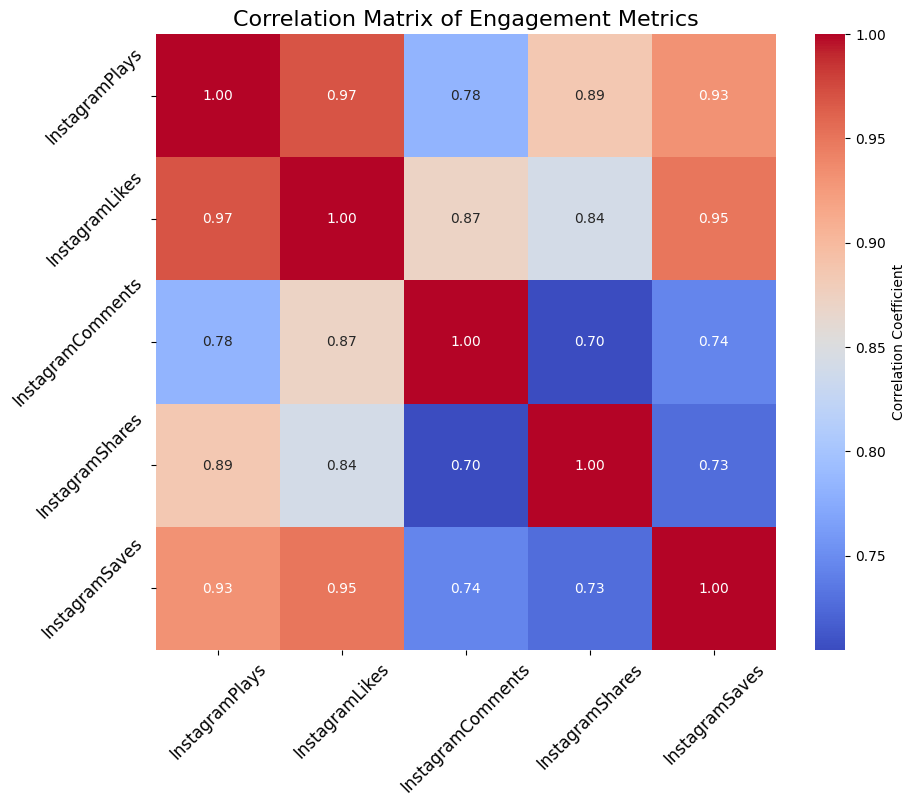

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


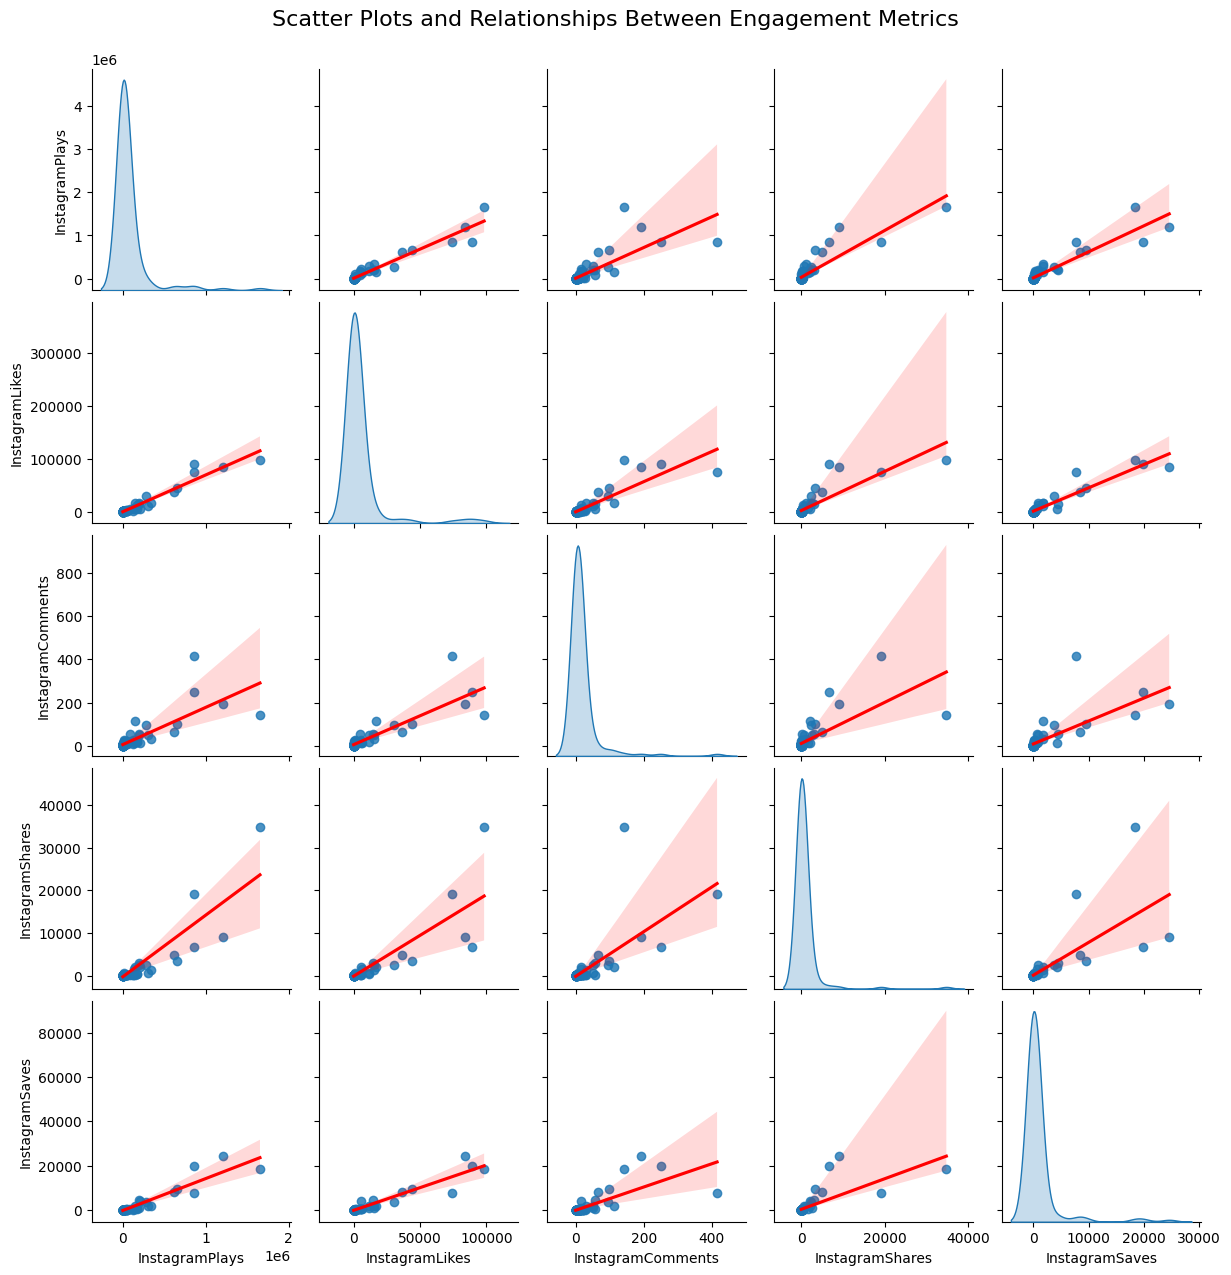

In [24]:
# Filter the dataset for relevant metrics
metrics = ['InstagramPlays', 'InstagramLikes', 'InstagramComments', 'InstagramShares', 'InstagramSaves']
correlation_data = data[metrics]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Engagement Metrics', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=12)
plt.show()

# Pairwise scatter plots with regression lines
sns.pairplot(correlation_data, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Scatter Plots and Relationships Between Engagement Metrics', y=1.02, fontsize=16)
plt.show()


## Removing outliers

Mean Squared Error (MSE): 1041851273.27
R-squared (R2): 0.94


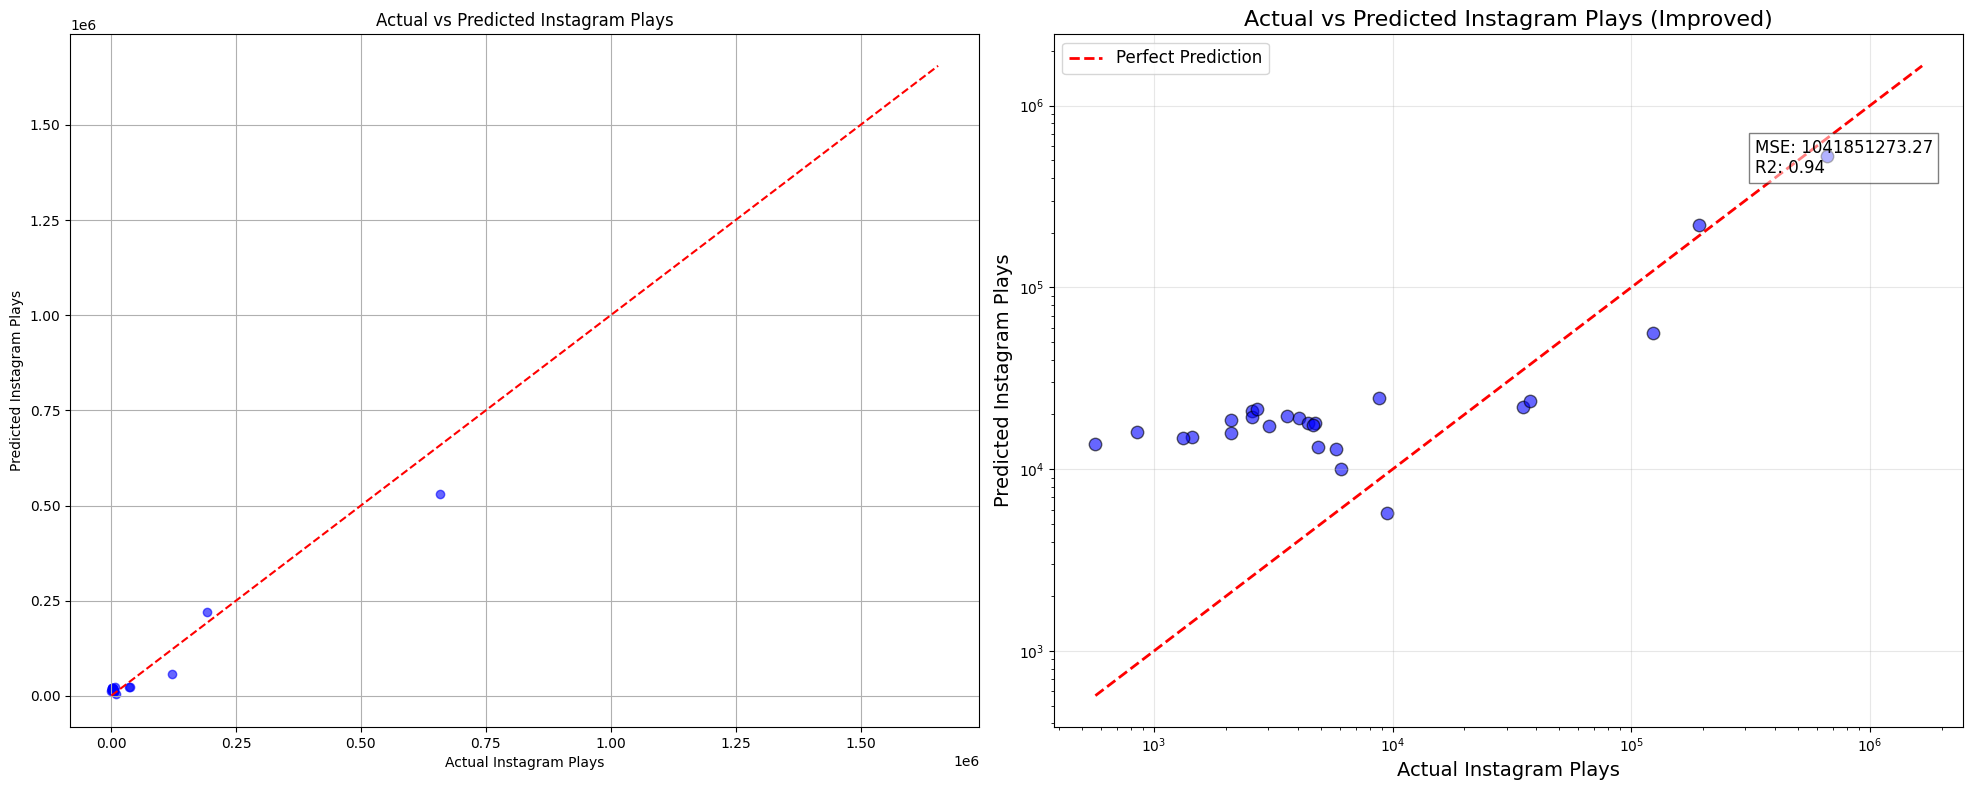

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

features = ['Duration', 'InstagramLikes', 'InstagramComments', 'InstagramShares', 'InstagramSaves']
target = 'InstagramPlays'

data = data[features + [target]].dropna()

# Train-test split
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression fitting for the model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Model coefficients
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# First scatter plot
axes[0].scatter(y_test, y_pred, alpha=0.6, color='blue')
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
axes[0].set_xlabel('Actual Instagram Plays')
axes[0].set_ylabel('Predicted Instagram Plays')
axes[0].set_title('Actual vs Predicted Instagram Plays')
axes[0].grid()

# Second scatter plot with adjusted transparency and marker size
axes[1].scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k', s=80)
axes[1].plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2, label='Prediction')
axes[1].set_xlabel('Actual Instagram Plays', fontsize=14)
axes[1].set_ylabel('Predicted Instagram Plays', fontsize=14)
axes[1].set_title('Actual vs Predicted Instagram Plays (Improved)', fontsize=16)
axes[1].grid(alpha=0.3)
axes[1].set_yscale('log')
axes[1].set_xscale('log')
axes[1].text(y_test.max() * 0.5, y_pred.max() * 0.8, f'MSE: {mse:.2f}\nR2: {r2:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
axes[1].legend(fontsize=12)

plt.tight_layout()
plt.show()


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('reels_data.csv')


In [36]:
# Preprocessing
# Convert 'Upload Timestamp' to datetime
data['Upload Timestamp'] = pd.to_datetime(data['Upload Timestamp'], format='%b %d, %Y %I:%M %p')

# Extract Day of Week and Hour for Analysis
data['Day of Week'] = data['Upload Timestamp'].dt.day_name()
data['Hour'] = data['Upload Timestamp'].dt.hour

# Extract Caption Length
data['Caption Length'] = data['Caption'].apply(lambda x: len(str(x)))

# Categorize Hashtags (1 = contains hashtags, 0 = no hashtags)
data['Hashtags'] = data['Caption'].apply(lambda x: [word for word in str(x).split() if word.startswith('#')])
data['HasHashtags'] = data['Hashtags'].apply(lambda x: 1 if len(x) > 0 else 0)

# Filter relevant columns for engagement metrics
engagement_columns = ['InstagramPlays', 'InstagramLikes', 'InstagramComments', 'InstagramShares', 'InstagramSaves']

# Ensure numeric columns are clean
data[engagement_columns] = data[engagement_columns].apply(pd.to_numeric, errors='coerce')
data = data.dropna(subset=engagement_columns)



ANOVA Results - F-statistic: 0.86, P-value: 0.5257


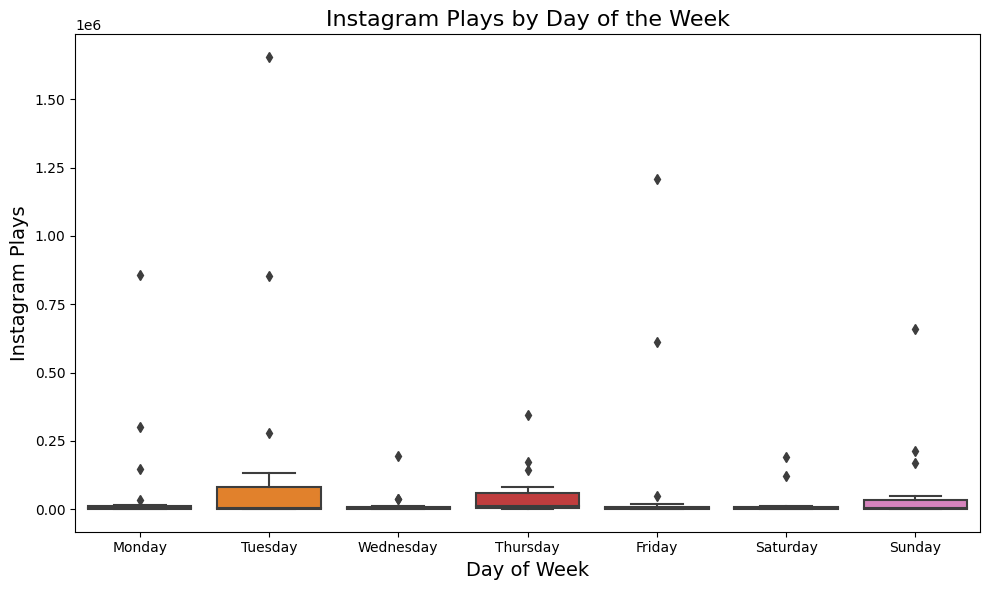

In [37]:
# ANOVA Test - Effect of Day of Week on Instagram Plays
anova_data = data[['Day of Week', 'InstagramPlays']].dropna()
days = anova_data['Day of Week'].unique()
groups = [anova_data[anova_data['Day of Week'] == day]['InstagramPlays'] for day in days]

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*groups)
print(f"ANOVA Results - F-statistic: {f_stat:.2f}, P-value: {p_value:.4f}")

# Visualize ANOVA results
plt.figure(figsize=(10, 6))
sns.boxplot(data=anova_data, x='Day of Week', y='InstagramPlays', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Instagram Plays by Day of the Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Instagram Plays', fontsize=14)
plt.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:         InstagramPlays   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     728.1
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           3.63e-68
Time:                        22:11:30   Log-Likelihood:                -1160.6
No. Observations:                  96   AIC:                             2331.
Df Residuals:                      91   BIC:                             2344.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.823e+04   8926.57

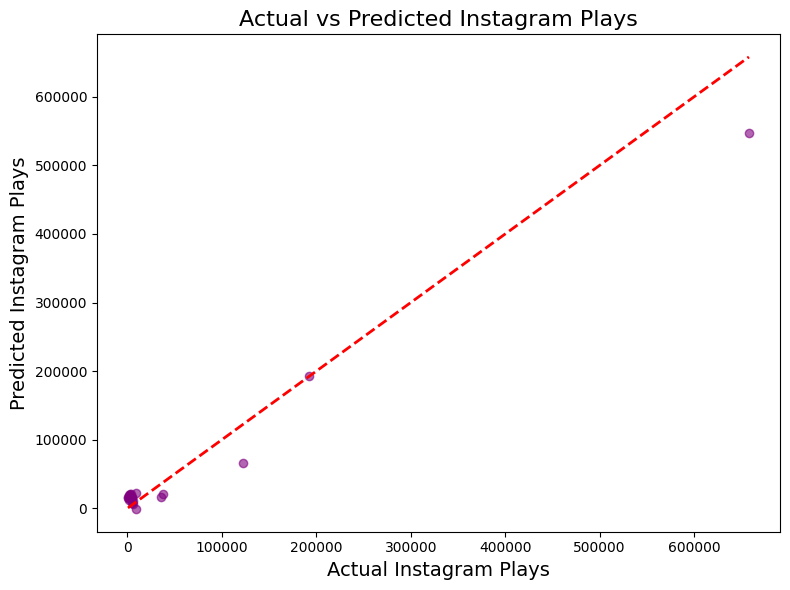

In [38]:
# Regression Analysis - Relationship Between Engagement Metrics
# Define independent variables (Duration, Likes, Comments, Shares)
X = data[['Duration', 'InstagramLikes', 'InstagramComments', 'InstagramShares']]
y = data['InstagramPlays']

# Add constant for statsmodels
X_sm = sm.add_constant(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(model.summary())

# Predict on the test data
y_pred = model.predict(sm.add_constant(X_test))

# Calculate R-squared and MSE
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}")

# Visualize Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted Instagram Plays', fontsize=16)
plt.xlabel('Actual Instagram Plays', fontsize=14)
plt.ylabel('Predicted Instagram Plays', fontsize=14)
plt.tight_layout()
plt.show()



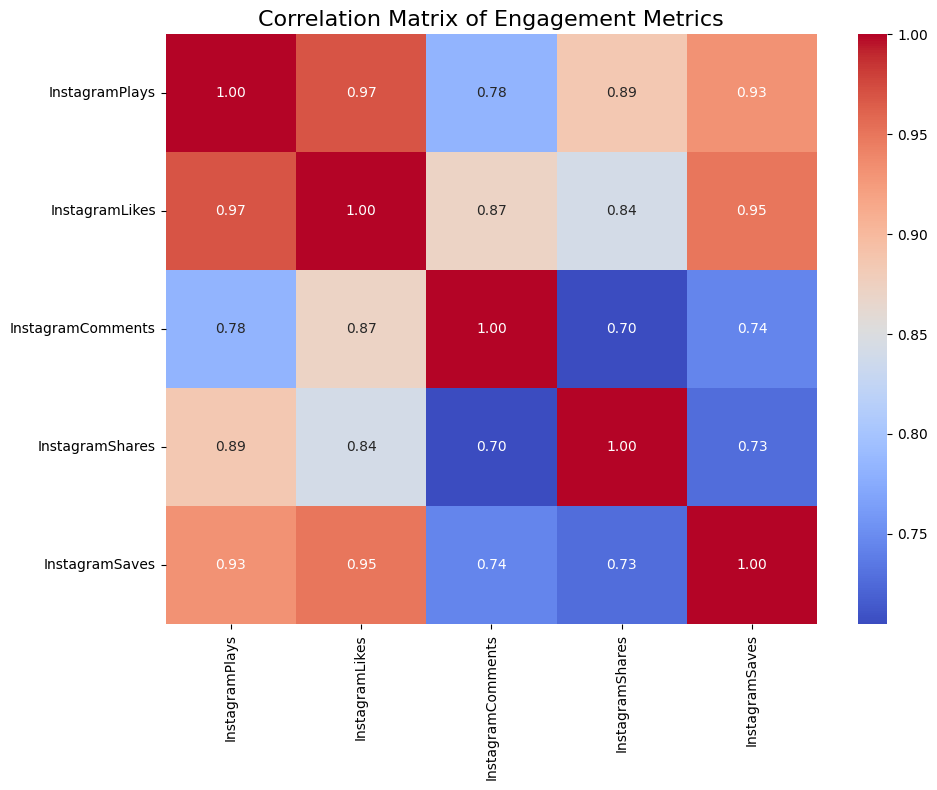

In [39]:
# Correlation Analysis - Strength of Relationships Between Metrics
# Calculate correlation matrix
correlation_matrix = data[engagement_columns].corr()

# Visualize Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Engagement Metrics', fontsize=16)
plt.tight_layout()
plt.show()

ANOVA Results (Without Outliers) - F-statistic: 0.44, P-value: 0.8475


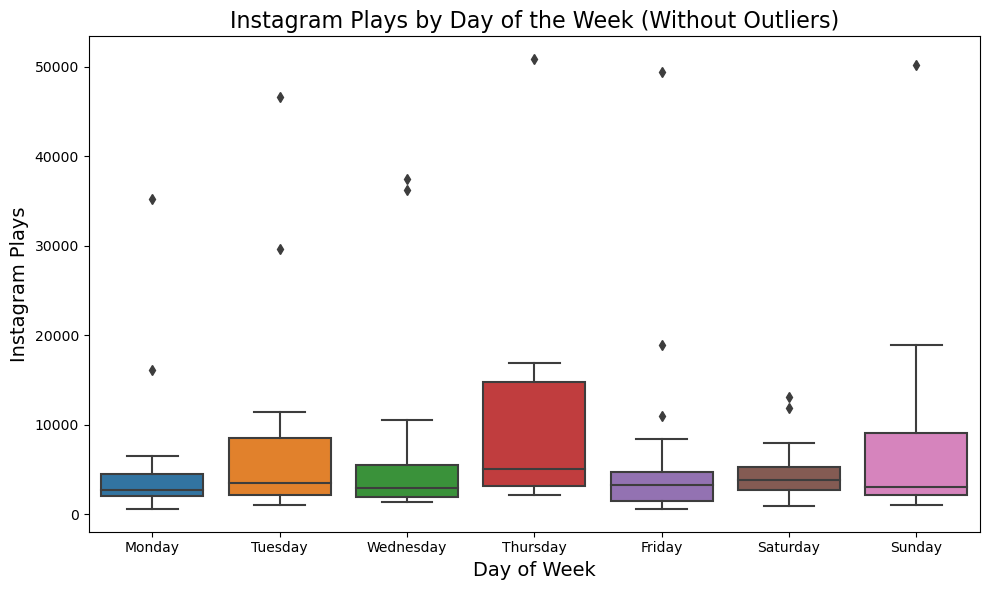

                            OLS Regression Results                            
Dep. Variable:         InstagramPlays   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     205.0
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           6.82e-40
Time:                        22:24:17   Log-Likelihood:                -765.94
No. Observations:                  81   AIC:                             1542.
Df Residuals:                      76   BIC:                             1554.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               703.6395    714.37

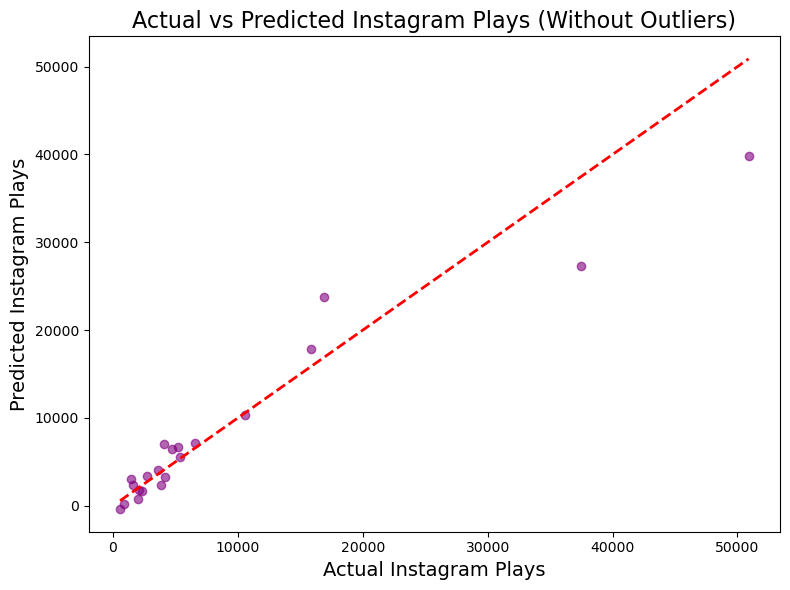

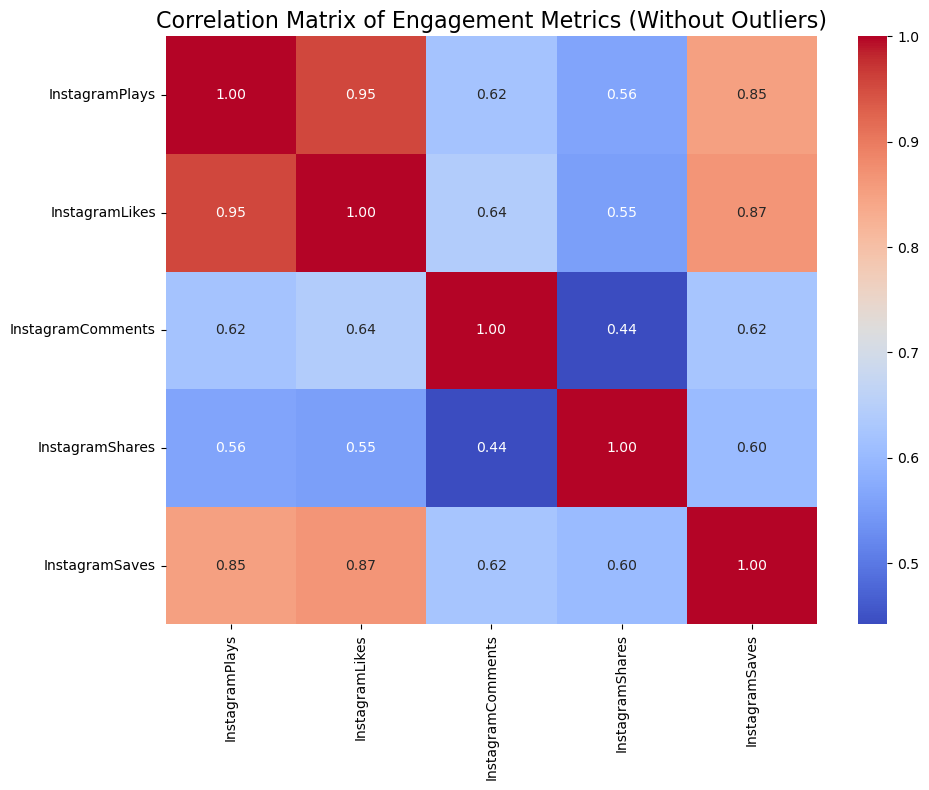

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('reels_data.csv')

# Preprocessing
# Convert 'Upload Timestamp' to datetime
data['Upload Timestamp'] = pd.to_datetime(data['Upload Timestamp'], format='%b %d, %Y %I:%M %p')

# Extract Day of Week and Hour for Analysis
data['Day of Week'] = data['Upload Timestamp'].dt.day_name()
data['Hour'] = data['Upload Timestamp'].dt.hour

# Extract Caption Length
data['Caption Length'] = data['Caption'].apply(lambda x: len(str(x)))

# Categorize Hashtags (1 = contains hashtags, 0 = no hashtags)
data['Hashtags'] = data['Caption'].apply(lambda x: [word for word in str(x).split() if word.startswith('#')])
data['HasHashtags'] = data['Hashtags'].apply(lambda x: 1 if len(x) > 0 else 0)

# Filter relevant columns for engagement metrics
engagement_columns = ['InstagramPlays', 'InstagramLikes', 'InstagramComments', 'InstagramShares', 'InstagramSaves']

# Ensure numeric columns are clean
data[engagement_columns] = data[engagement_columns].apply(pd.to_numeric, errors='coerce')
data = data.dropna(subset=engagement_columns)

# Remove Top 15 Outliers based on Instagram Plays
data = data.sort_values(by='InstagramPlays', ascending=False).iloc[20:]

# ANOVA Test - Effect of Day of Week on Instagram Plays
anova_data = data[['Day of Week', 'InstagramPlays']].dropna()
days = anova_data['Day of Week'].unique()
groups = [anova_data[anova_data['Day of Week'] == day]['InstagramPlays'] for day in days]

# Perform ANOVA
f_stat, p_value = stats.f_oneway(*groups)
print(f"ANOVA Results (Without Outliers) - F-statistic: {f_stat:.2f}, P-value: {p_value:.4f}")

# Visualize ANOVA results
plt.figure(figsize=(10, 6))
sns.boxplot(data=anova_data, x='Day of Week', y='InstagramPlays', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Instagram Plays by Day of the Week (Without Outliers)', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Instagram Plays', fontsize=14)
plt.tight_layout()
plt.show()


# Regression Analysis - Relationship Between Engagement Metrics
# Define independent variables (Duration, Likes, Comments, Shares)
X = data[['Duration', 'InstagramLikes', 'InstagramComments', 'InstagramShares']]
y = data['InstagramPlays']

# Add constant for statsmodels
X_sm = sm.add_constant(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
print(model.summary())

# Predict on the test data
y_pred = model.predict(sm.add_constant(X_test))

# Calculate R-squared and MSE
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (Without Outliers): {mse:.2f}, R-squared: {r2:.2f}")

# Visualize Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted Instagram Plays (Without Outliers)', fontsize=16)
plt.xlabel('Actual Instagram Plays', fontsize=14)
plt.ylabel('Predicted Instagram Plays', fontsize=14)
plt.tight_layout()
plt.show()

# Correlation Analysis - Strength of Relationships Between Metrics
# Calculate correlation matrix
correlation_matrix = data[engagement_columns].corr()

# Visualize Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Engagement Metrics (Without Outliers)', fontsize=16)
plt.tight_layout()
plt.show()
